In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error,mean_absolute_percentage_error
import math


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Đồ án/OLAP/2. Source/Data Mining/athletes.csv")
df

,game_year,SL VDV Tham Gia
0,1896,268
1,1900,626
2,1904,747
3,1908,1069
4,1912,1618
5,1920,1033
6,1924,2036
7,1928,1547
8,1932,1134
9,1936,2795


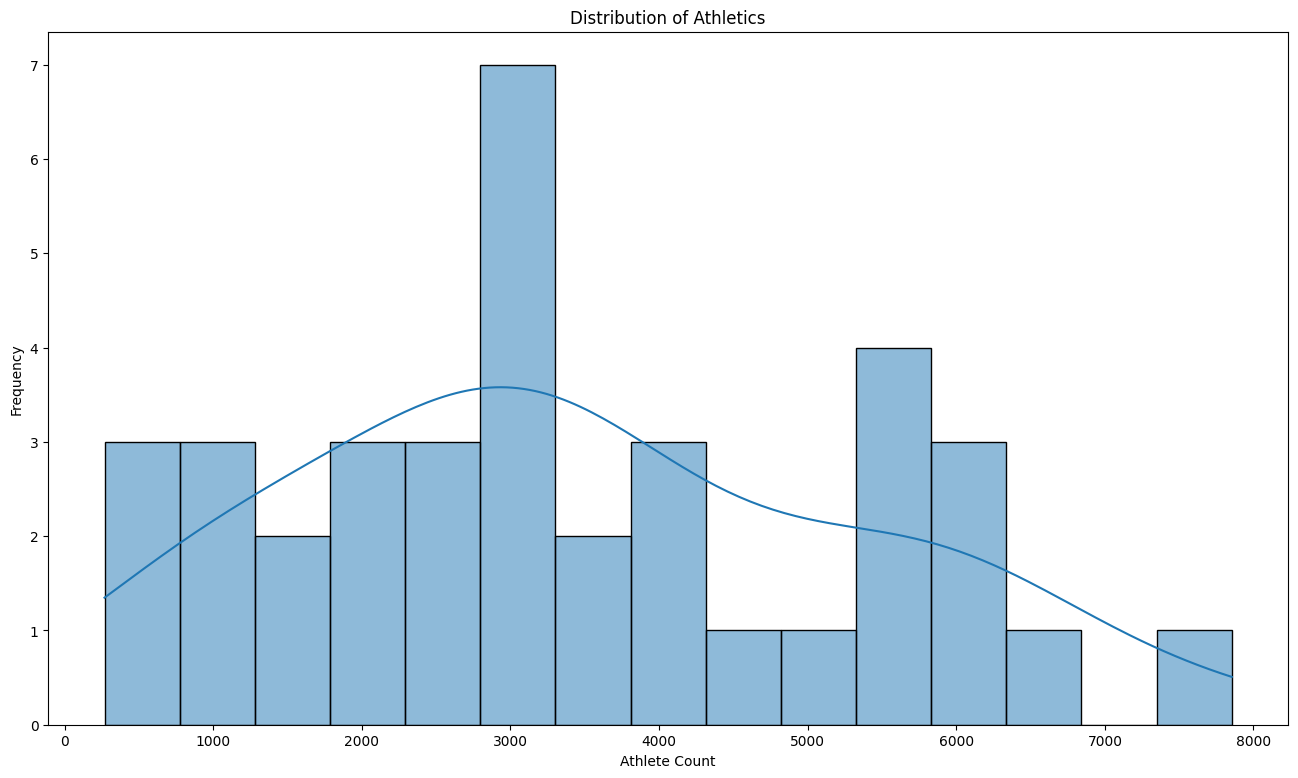

In [ ]:
# Tạo biểu đồ histogram
plt.figure(figsize=(16, 9))
sns.histplot(data=df, x='SL VDV Tham Gia', bins=15, kde=True)
plt.title('Distribution of Athletics')
plt.xlabel('Athlete Count')
plt.ylabel('Frequency')
plt.show()

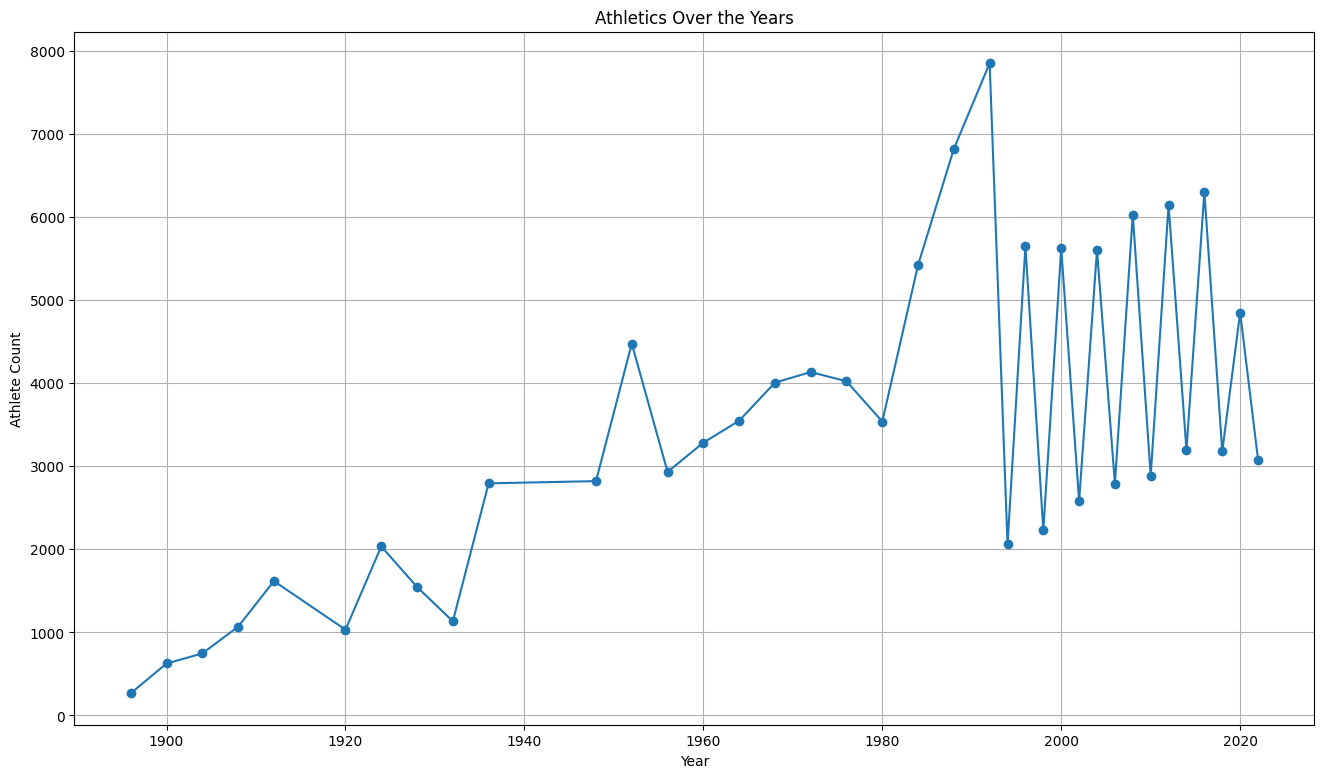

In [ ]:
# Tạo biểu đồ đường
plt.figure(figsize=(16, 9))
plt.plot(df['game_year'], df['SL VDV Tham Gia'], marker='o')
plt.title('Athletics Over the Years')
plt.xlabel('Year')
plt.ylabel('Athlete Count')
plt.grid(True)
plt.show()

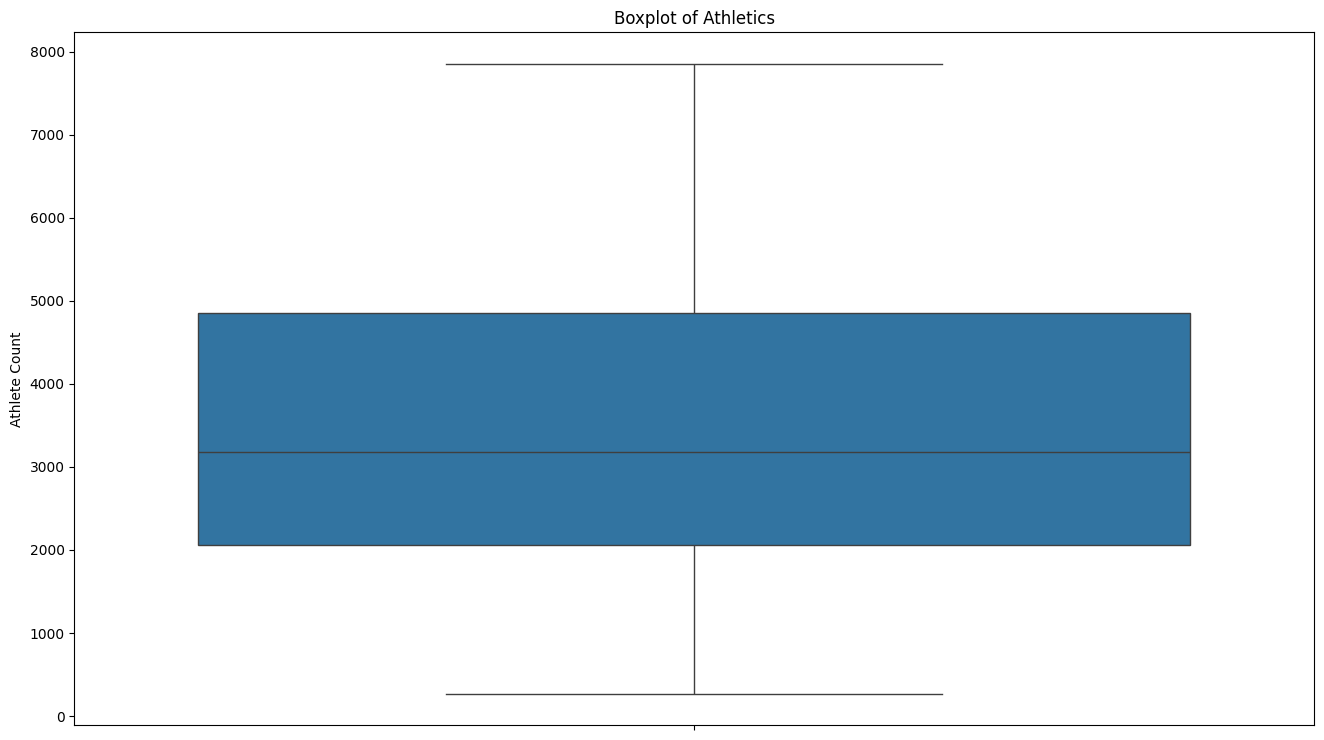

In [ ]:
# Tạo biểu đồ boxplot
plt.figure(figsize=(16, 9))
sns.boxplot(data=df, y='SL VDV Tham Gia')
plt.title('Boxplot of Athletics')
plt.ylabel('Athlete Count')
plt.show()

Sử dụng Linear Regression

In [ ]:
# Tạo mô hình hồi quy tuyến tính
model = LinearRegression()

# Phù hợp mô hình với dữ liệu hiện có
model.fit(df[['game_year']], df['SL VDV Tham Gia'])

# Dự đoán số lượng huy chương cho kỳ Olympics tiếp theo
future_years = np.array([2024, 2028, 2032, 2036, 2040]).reshape(-1, 1)
predicted_athlete = model.predict(future_years)

# Xuất kết quả dự đoán
for year, athletes in zip(future_years.flatten(), predicted_athlete):
    print(f"Predicted medals for {year}: {int(athletes)}")

Predicted medals for 2024: 5224
Predicted medals for 2028: 5357
Predicted medals for 2032: 5490
Predicted medals for 2036: 5623
Predicted medals for 2040: 5756


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:


# Chuyển đổi dữ liệu thực tế về dạng numpy array và chỉ lấy 5 giá trị cuối cùng
actual_athlete = df['SL VDV Tham Gia'].values[-len(predicted_athlete):]
# Tính toán RMSE, MAPE, MDA trên Linear

test_score_rmse=np.sqrt(mean_squared_error(actual_athlete, predicted_athlete))
test_score_mape=mean_absolute_percentage_error(actual_athlete, predicted_athlete) * 100

print('RMSE:', test_score_rmse)
print('MAPE:', test_score_mape, '%')


RMSE: 1902.275645859886
MAPE: 50.75417428218185 %


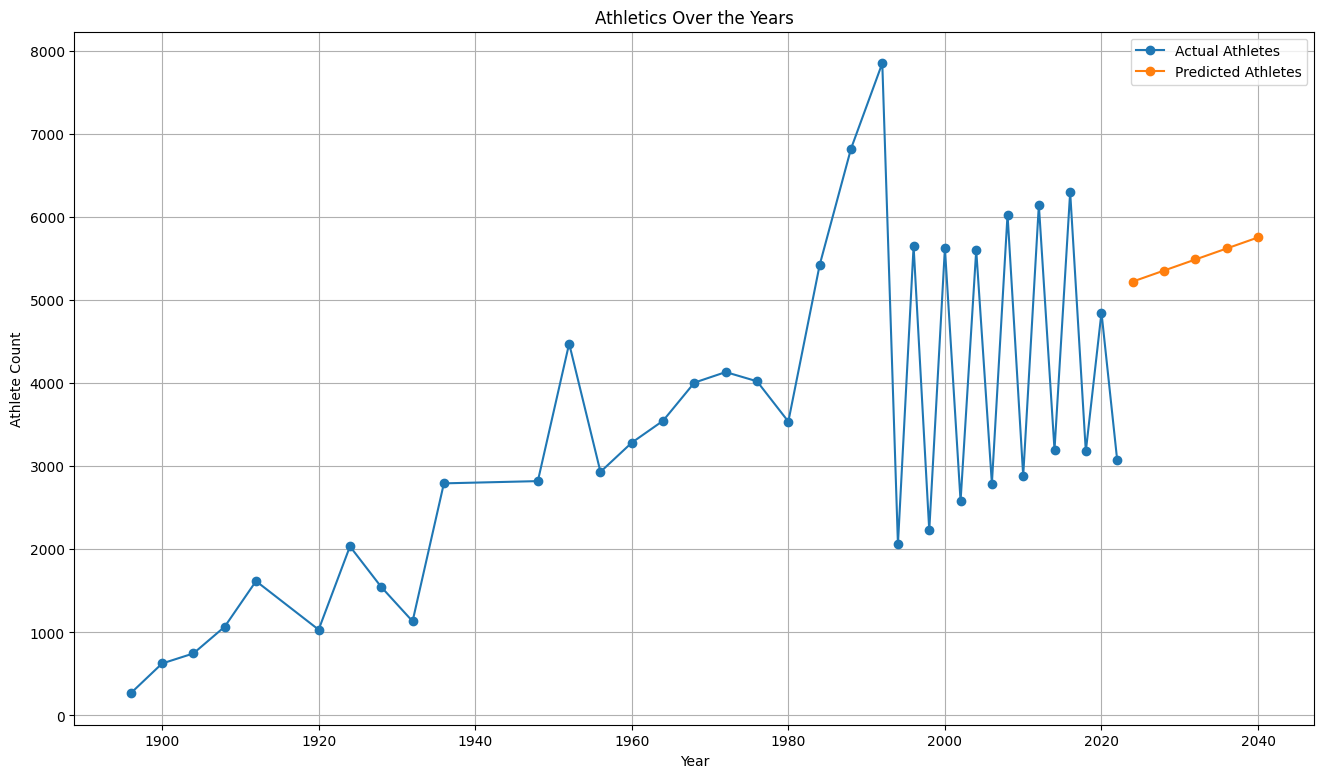

In [ ]:
# Tạo biểu đồ đường
plt.figure(figsize=(16, 9))
plt.plot(df['game_year'], df['SL VDV Tham Gia'], marker='o', label='Actual Athletes')
plt.plot(future_years, predicted_athlete, marker='o', label='Predicted Athletes')
plt.title('Athletics Over the Years')
plt.xlabel('Year')
plt.ylabel('Athlete Count')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [ ]:
# Chuyển đổi dữ liệu sang dạng chuỗi thời gian
df['game_year'] = pd.to_datetime(df['game_year'], format='%Y')
df = df.set_index('game_year')

In [ ]:
# Chuẩn hóa dữ liệu
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df)

In [ ]:
# Chuyển đổi dữ liệu thành dạng phù hợp cho LSTM
def create_sequences(data, sequence_length):
    X = []
    y = []
    for i in range(len(data) - sequence_length):
        X.append(data[i:i+sequence_length])
        y.append(data[i+sequence_length])
    return np.array(X), np.array(y)

In [ ]:
sequence_length = 5  # Độ dài chuỗi dự báo
X, y = create_sequences(scaled_data, sequence_length)

In [ ]:
# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
train_size = int(0.8 * len(X))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [ ]:
# Xây dựng mô hình LSTM
model = Sequential()
model.add(LSTM(64, activation='relu', input_shape=(sequence_length, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Huấn luyện mô hình
history = model.fit(X_train, y_train, epochs=200, batch_size=16, validation_data=(X_test, y_test))

Epoch 1/200
2/2 [==============================] - 3s 448ms/step - loss: 0.2865 - val_loss: 0.3176
Epoch 2/200
2/2 [==============================] - 0s 47ms/step - loss: 0.2693 - val_loss: 0.2987
Epoch 3/200
2/2 [==============================] - 0s 55ms/step - loss: 0.2555 - val_loss: 0.2811
Epoch 4/200
2/2 [==============================] - 0s 65ms/step - loss: 0.2410 - val_loss: 0.2645
Epoch 5/200
2/2 [==============================] - 0s 52ms/step - loss: 0.2286 - val_loss: 0.2489
Epoch 6/200
2/2 [==============================] - 0s 55ms/step - loss: 0.2163 - val_loss: 0.2342
Epoch 7/200
2/2 [==============================] - 0s 48ms/step - loss: 0.2052 - val_loss: 0.2201
Epoch 8/200
2/2 [==============================] - 0s 70ms/step - loss: 0.1934 - val_loss: 0.2064
Epoch 9/200
2/2 [==============================] - 0s 63ms/step - loss: 0.1822 - val_loss: 0.1932
Epoch 10/200
2/2 [==============================] - 0s 56ms/step - loss: 0.1721 - val_loss: 0.1800
Epoch 11/200
2/2 [

In [ ]:
# Dự đoán số lượng huy chương cho 5 kỳ Olympics tiếp theo
future_years = pd.date_range(start='2024', periods=5, freq='Y')
lstm_predicted_athlete = []
current_data = scaled_data[-sequence_length:]

for i in range(5):
    X_future = np.array([current_data])
    X_future = np.reshape(X_future, (X_future.shape[0], X_future.shape[1], 1))  # Reshape the input data
    lstm_predicted_athlete_scaled = model.predict(X_future)
    lstm_predicted_athlete.append(scaler.inverse_transform(lstm_predicted_athlete_scaled).flatten()[0])
    current_data = np.append(current_data[1:], lstm_predicted_athlete_scaled)

# Tạo danh sách các năm dự đoán
predicted_years = pd.date_range(start=future_years[0], periods=5, freq='Y')

1/1 [==============================] - 0s 23ms/step


In [ ]:
# Print the predicted medal counts
years = [2024, 2028, 2032, 2036, 2040]
for i in range(len(years)):
    print(f"Predicted Athelete count for {years[i]}: {lstm_predicted_athlete[i]:.0f} athletes")

Predicted Athelete count for 2024: 4270 athletes
Predicted Athelete count for 2028: 4220 athletes
Predicted Athelete count for 2032: 4124 athletes
Predicted Athelete count for 2036: 4155 athletes
Predicted Athelete count for 2040: 4160 athletes


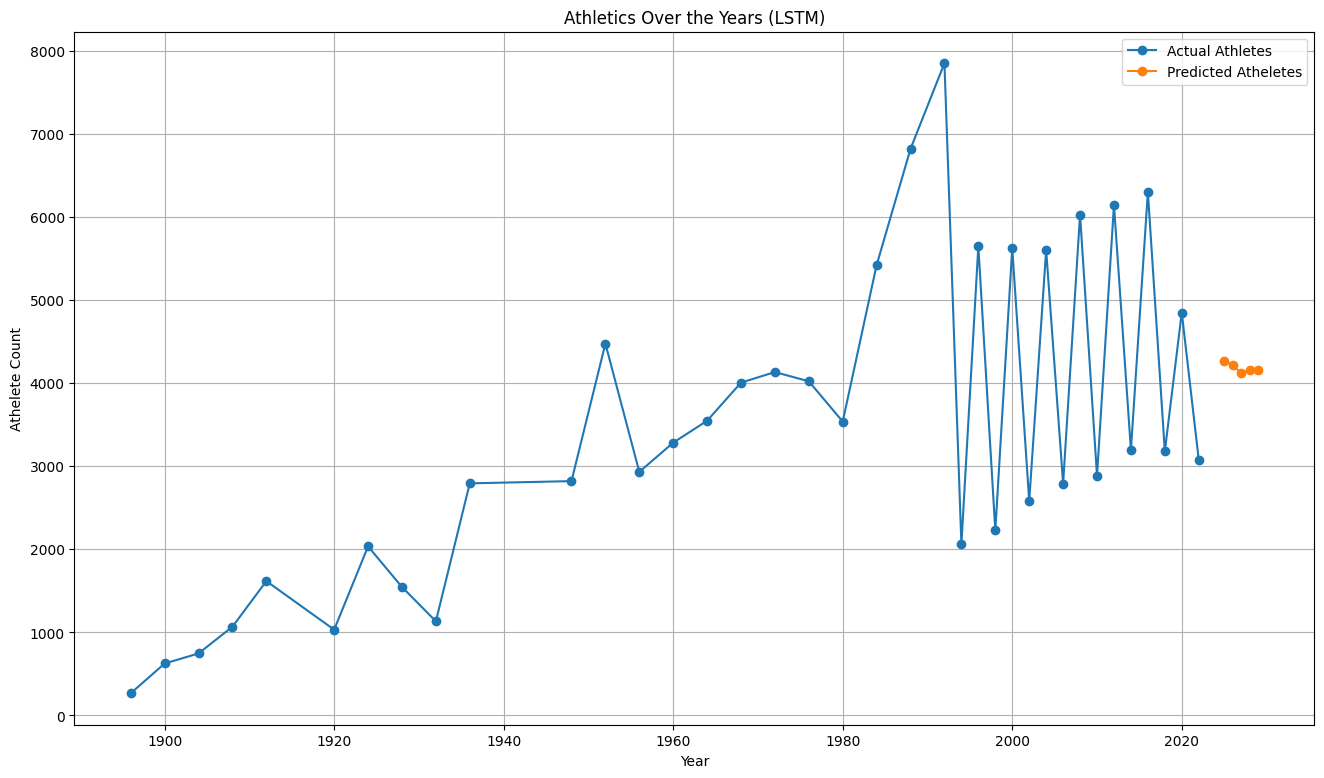

In [ ]:
# Trực quan hoá kết quả dự đoán
plt.figure(figsize=(16, 9))
plt.plot(df.index, df['SL VDV Tham Gia'], marker='o', label='Actual Athletes')
plt.plot(predicted_years, lstm_predicted_athlete, marker='o', label='Predicted Atheletes')
plt.title('Athletics Over the Years (LSTM)')
plt.xlabel('Year')
plt.ylabel('Athelete Count')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Chuyển đổi dữ liệu thực tế về dạng numpy array
actual_athlete = df['SL VDV Tham Gia'].values[-5:]

# Tính toán RMSE, MAPE, MDA trên LSTM
test_score_rmse=np.sqrt(mean_squared_error(actual_athlete, lstm_predicted_athlete))
test_score_mape=mean_absolute_percentage_error(actual_athlete, lstm_predicted_athlete) * 100

print('RMSE:', test_score_rmse)
print('MAPE:', test_score_mape, '%')


RMSE: 1267.3204242108072
MAPE: 29.13095297289214 %
